# WeRate Dogs Twitter Archive 
# By Tash Bettridge 



# Step1. Gathering Data


# Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to analyse the findings retrieved from the data from Twitter by analysing trends and creating data visualizations.



# Data

The data will be analysed from the following:
- Enhanced Twitter Archive
- Data retrieved by the Twitter API
- Image Predictions File


# Process

The data wrangling steps that were involved in this project were:
- Step1. Gathering data
- Step2. Assessing data
- Step3. Cleaning data

Data Analysis, storing data and data visualization of the wrangled data


In [1]:
import pandas as pd
import numpy as np
import json
import tweepy
import time
import math


In [2]:
# Import the Twitter archive CSV file
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
# Declare Twitter API keys and access tokens
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'


In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [5]:
import requests
from io import BytesIO
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


# Step2. Assessing Data 

In [6]:
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')



In [7]:
image_predictions = pd.read_csv(BytesIO(data.content), sep = '\t')



In [8]:
image_predictions.to_csv('image-predictions.tsv', sep='\t', )


In [9]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#check for observation
image_predictions.iloc[2]

tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

# Retweet count and favorite count data¶


In [11]:
data = []
with open('tweet-json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_data = pd.DataFrame.from_dict(data)



In [12]:
tweet_data


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [13]:
tweet_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [14]:
tweet_data.describe()


,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [15]:
# Check if there are any records that could contain possible_sensitve 
tweet_data.possibly_sensitive.value_counts()


False    2211
Name: possibly_sensitive, dtype: int64

In [16]:
# Check for duplicates
tweet_data.duplicated(subset=['id']).any()


False

In [17]:
# Check data entitites 
tweet_data.entities[0]


{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [18]:
# Check extended entities 
tweet_data.extended_entities[0]


{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [20]:
# Check for retweets
tweet_data[tweet_data.retweeted_status.notnull()].retweeted_status[31]


{'created_at': 'Sat Jul 15 02:44:07 +0000 2017',
 'id': 886053734421102592,
 'id_str': '886053734421102592',
 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo',
 'truncated': False,
 'display_text_range': [0, 11],
 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/WxwJmvjfxo',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'display_url': 'twitter.com/dog_rates/stat…',
    'indices': [12, 35]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19607400,
  'id_str': '19607400',
  'name': "Oakland A's 🌳🐘⚾️",
  'screen_name': 'Athletics',
  'location': 'Oakland, CA',
  'description': 'Official Twitter of the four-time World Series champion Oakland Athletic

In [21]:
# Check image predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
# Check prediciton entitites 
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.describe()


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
# Check for duplicates 
image_predictions.duplicated(subset=['tweet_id']).any()


False

In [25]:
image_predictions.duplicated(subset=['jpg_url']).any()


True

In [26]:
# Check twitter archives 
twitter_archives


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [27]:
twitter_archives.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
# Check for doggo
twitter_archives.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [29]:
twitter_archives.floofer.value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [30]:
twitter_archives[twitter_archives.floofer == 'floofer'].text


46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

In [31]:
# Check for puppo value
twitter_archives.puppo.value_counts()



None     2326
puppo      30
Name: puppo, dtype: int64

In [32]:
twitter_archives.describe() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [33]:
twitter_archives[twitter_archives['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [34]:
twitter_archives[twitter_archives['rating_denominator'] != 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [35]:
# Check for dog names in twitter_archives 
twitter_archives.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Daisy          7
Toby           7
Bailey         7
Buddy          7
Jack           6
Bella          6
Leo            6
Jax            6
Stanley        6
Milo           6
Koda           6
Oscar          6
Scout          6
Rusty          6
Dave           6
Oakley         5
            ... 
Obi            1
Boston         1
Pawnd          1
Hector         1
Daniel         1
Lizzie         1
Howie          1
Kulet          1
Bowie          1
Scruffers      1
Jett           1
Bradley        1
Jareld         1
Timofy         1
Link           1
Miley          1
Strudel        1
Grady          1
Doobert        1
Frönq          1
Apollo         1
Harry          1
Einstein       1
Kendall        1
Evy            1
Jordy          1
Autumn         1
Skye          

# Quality

1. tweet_data Table:

- There are some disaprities in the tweet_data which is from the Twitter api has column names where some columns have geo	...	quoted_status	quoted_status_id, quoted_status_id_str or quoted_status_permalink with None or NaN
- The source column contains the html tag <a href="http://twitter.com/download/iphone" r...	

2. twitter_archive Table:

- rating_numerator column has values less than 10. 
- There are some disparities in the rating_denominator column which has values other than 10. 
- There are some records that have more than one dog.
- There are some  retweets and duplicates.
- There are some html tags in the source column: href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a> 
- There are duplicates in the dog name table. There maybe an error since "a" is counted 55 times. 
- There was also "an" as the the dogs names in the table. 


# Tidiness 

- The image_predictions and the tweet_data should be combined with the twitter_archive table this would make the data cleaner to read. 
- doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column. 
- Columns that contain duplicate information of entities should be extended. 
- The breed column should be added in twiiter_archive table as its values are based on p1_conf and p1_dog columns of img_df image_predictions table.




## Step3. Cleaning Data

In [37]:
# Take a copy of the tweet_api_data, image_predictions and the twitter_archives on which the cleaning tasks will be performed

tweet_data_clean = tweet_data.copy()
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy() 


# Quality

Some of the tables contain retweets and duplicates. Specifically, in tweet_api_data that have retweets.



# Define

Create a datagram keeping only those original or real time tweets. This is one by removing tweets that are retweeted from the tweet_data. 




# Code 

In [38]:
#Create datagram and remove tweets that are retweeted from the tweet_api_data
real_tweet_data_from_retweet = tweet_data_clean[tweet_data_clean.retweeted_status.notnull()].retweeted_status
real_tweet_data_from_retweet = pd.DataFrame(real_tweet_data_from_retweet.tolist())



In [40]:
tweet_data_clean = tweet_data_clean[tweet_data_clean.retweeted_status.isnull()]

tweet_data_clean = tweet_data_clean.drop(['retweeted_status'], axis=1)

In [41]:
tweet_data_clean = tweet_data_clean.append(real_tweet_data_from_retweet)

# Test

In [42]:
tweet_data_clean.shape[0] == tweet_data.shape[0]

True

# Define

Create a table to combine columns ['p1','p2', 'p3'] from then drop duplicates from the image_predictions data. Then clean up the data by dropping ['p1_dog', 'p2_dog', 'p3_dog']. 



# Code 



In [43]:
#create the dataframe
prediction_dog_clean = pd.DataFrame()
x = pd.DataFrame()




In [44]:
col = ['p1','p2', 'p3']
for c in col:
    x = pd.DataFrame()
    x['prediction'] = image_predictions_clean[c]
    x['is_dog'] = image_predictions_clean[c+'_dog']
    if (c == 'p1'):
        prediction_dog_clean = x
    else:
        prediction_dog_clean.append(x)



In [45]:
#remove duplicates 
prediction_dog_clean.drop_duplicates(inplace=True)




In [46]:
image_predictions_clean = image_predictions_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

# Test 

In [47]:
prediction_dog_clean.duplicated(['prediction']).any()

False

In [48]:
image_predictions_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p2          2075 non-null object
p2_conf     2075 non-null float64
p3          2075 non-null object
p3_conf     2075 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 146.0+ KB


# Define

There are duplicated entries inthe twitter_archives and twitter_data tables we are going to drop the duplicate columns. 




# Code

In [49]:
twitter_archives_clean = twitter_archives_clean.drop([
    'timestamp', 'text', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)




# Test

In [54]:
all_columns = pd.Series(list(tweet_data_clean) + list(twitter_archives_clean))
all_columns[all_columns.duplicated()]


Series([], dtype: object)

# Define 

Merge tweet_data and image_recognition table to the twitter_archive table.


# Code 

In [55]:
#Merge tweet_api_data and image_recognition table to the twitter_archive table
twitter_archives_clean = pd.merge(tweet_data_clean, twitter_archives_clean, left_on='id', right_on='tweet_id', how='right')


In [56]:
twitter_archives_clean = twitter_archives_clean.drop(['tweet_id'], axis=1)

In [57]:
twitter_archives_clean = pd.merge(twitter_archives_clean, image_predictions_clean, left_on='id', right_on='tweet_id', how='left')


# Test 

In [58]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 50 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2330 non-null object
display_text_range               2330 non-null object
entities                         2330 non-null object
extended_entities                2137 non-null object
favorite_count                   2330 non-null float64
favorited                        2330 non-null object
full_text                        2330 non-null object
geo                              0 non-null object
id                               2330 non-null float64
id_str                           2330 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-nu

# Define

Remove the timestamp, text as they are duplicated in twitter_api and in the twitter_archive's table.



# Code

In [59]:
# clean the data by dropping data columns that empty values, duplicate values and that are empty.
twitter_archives_clean = twitter_archives_clean.drop([
    'favorited', 'geo', 'user', 'retweeted', 
    'coordinates', 'contributors', 'place', 'quoted_status_id', 
    'quoted_status_id_str'], axis=1)



# Quality 

As the twitter_archives tables has many empty values, duplicate values that are empty. For quality purpose remoe the columns. 

# Define

clean the data by dropping data columns that empty values, duplicate values and that are empty.
   

# Test

In [60]:
twitter_archives_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 41 columns):
created_at                       2330 non-null object
display_text_range               2330 non-null object
entities                         2330 non-null object
extended_entities                2137 non-null object
favorite_count                   2330 non-null float64
full_text                        2330 non-null object
id                               2330 non-null float64
id_str                           2330 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2330 non-null object
lang                             2330 non-null object
possibly_sensitive               2272 non-null object
possibly_sensitive_appealable    22

# Define
Merge the doggo, floofer, pupper and puppo columns to a stage column.



# Code

In [61]:
#merge the doggo, floofer, pupper and puppo columns to a stage column
twitter_archives_clean['stage'] = twitter_archives_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)




In [62]:
twitter_archives_clean.stage = twitter_archives_clean.stage.astype('category')

In [63]:
twitter_archives_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


# Test

In [64]:
twitter_archives_clean.stage.value_counts()


None       2099
pupper      276
doggo        91
puppo        35
floofer      10
Name: stage, dtype: int64

# Define


Look for source from the twitter archives by extracting data from href. 

# Code 

In [65]:
twitter_archives_clean['source'] = twitter_archives_clean.source.str.extract(r'href="(.+?)"')


# Test

In [66]:
twitter_archives_clean['source'].value_counts()


http://twitter.com/download/iphone              2182
http://vine.co                                   103
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      12
Name: source, dtype: int64

There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":

Twitter for iPhone
Vine 
Twitter
TweetDeck


# Define


As there are dog names that are listed as"None" instead of "nan"in the table will change the valoues. 


# Code

In [68]:
twitter_archives_clean.name.replace('None', np.nan, inplace=True)


# Test

In [69]:
(twitter_archives_clean.name == 'None').any()


False


# Define

As there are duplicate names and names like "a" which was represented 55 times and "an" which was represented as a name 6 times. Those would be replaced with nan instead. 


# Code 

In [70]:
twitter_archives_clean.name.replace(['a', 'an'], np.nan, inplace=True)


# Test

In [71]:
(twitter_archives_clean.name == 'an').any()


False

In [72]:
twitter_archives.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

# Define 

Some records whose rating_denominator is less than 10 and divisible by 10 are supplying a invalid output. 
Therefore, we are going to define this by Dropping rows to fix this.


# Code

In [73]:
twitter_archives_clean = twitter_archives_clean[(twitter_archives_clean.rating_numerator >= 10) & (twitter_archives_clean.rating_denominator == 10)]



# Test

In [74]:
(twitter_archives_clean.rating_numerator < 10).any()


False

# Store Data

In [75]:
#create predictions_mapping_Masters.CSV file 
with open('twitter_archive_master.csv', 'w') as outfile:  
    outfile.write(twitter_archives_clean.to_csv(index=False)) 
with open('predictions_mapping_master.csv', 'w') as outfile:  
    outfile.write(prediction_dog_clean.to_csv(index=False))
    
    

# Visualizing Data¶


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:

twitter_archives = pd.read_csv('twitter_archive_master.csv')

predictions_mappings = pd.read_csv('predictions_mapping_master.csv')

# What are the top 5 most common dog names?
plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

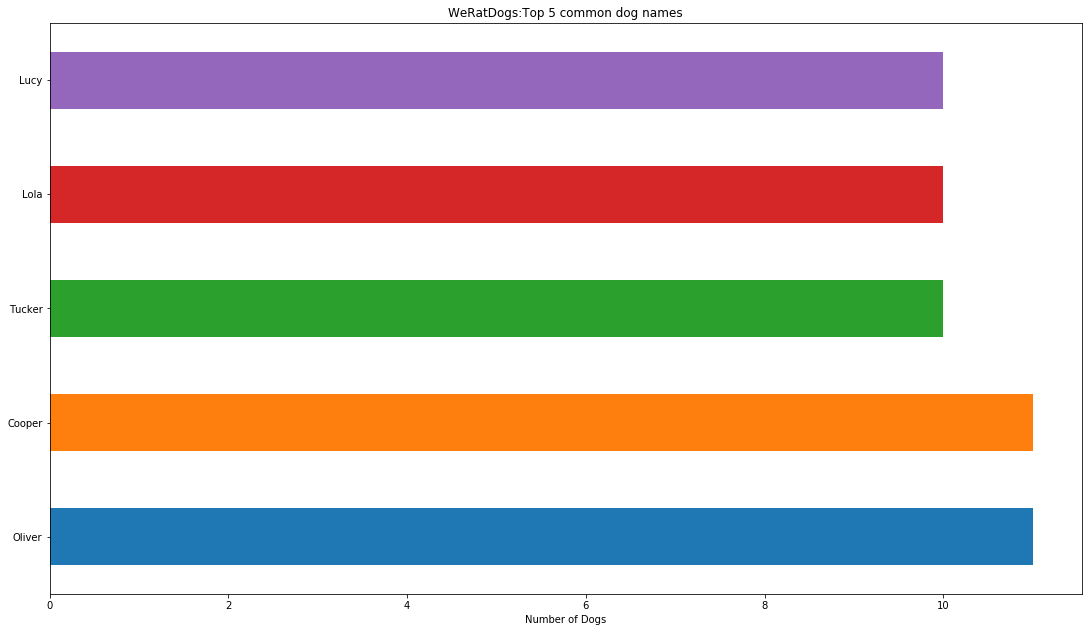

In [78]:
twitter_archives.name.value_counts()[2:7].plot('barh', figsize=(18.5,10.5), title='WeRatDogs:Top 5 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')
    

Based on the findings:

- Charlie is the most common dog name with Charlie 12
- Followed by Oliver(11), Lucy(11), Cooper(11),Lola(10)and Tucker(10)




# Twitter Engagement 

# Are there similarities in favourite and retweet counts?



Text(0.5,1,'WeRateDogs Favorite vs Retweet Count')

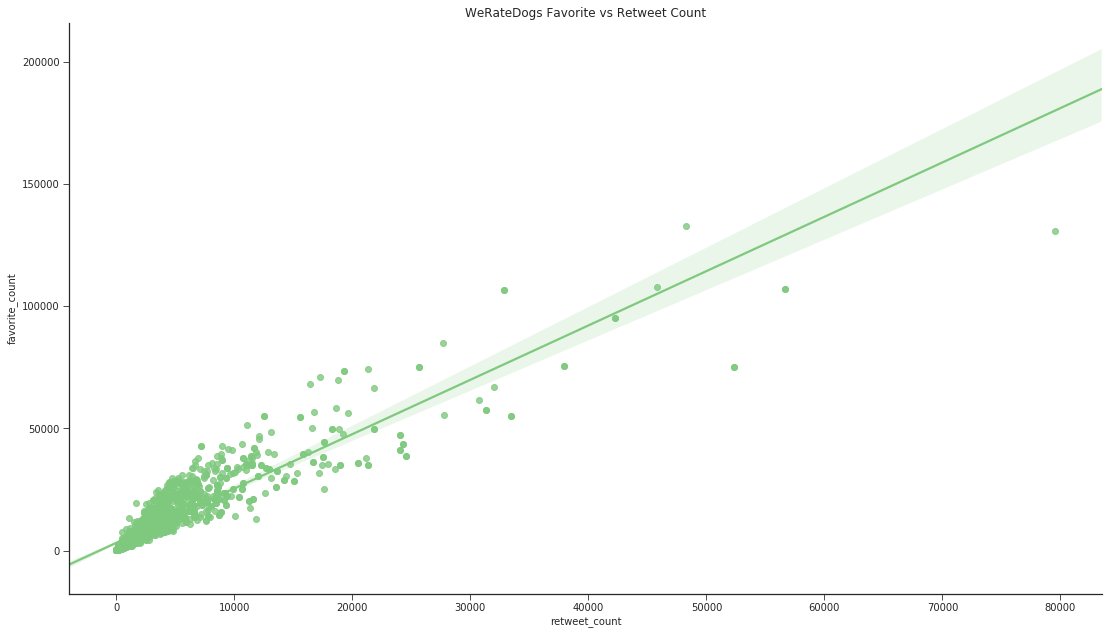

In [79]:
sns.set_palette("Accent", 8)
sns.set_style('ticks')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.despine()
sns.regplot(
    x='retweet_count', 
    y='favorite_count', data=twitter_archives)

plt.title('WeRateDogs Favorite vs Retweet Count')



From asssessing the above Twitter Engagement model, there are similiarites between favorite count and retweet counts.

# Twitter Engagement

# What is the median of dog rated tweets per day?




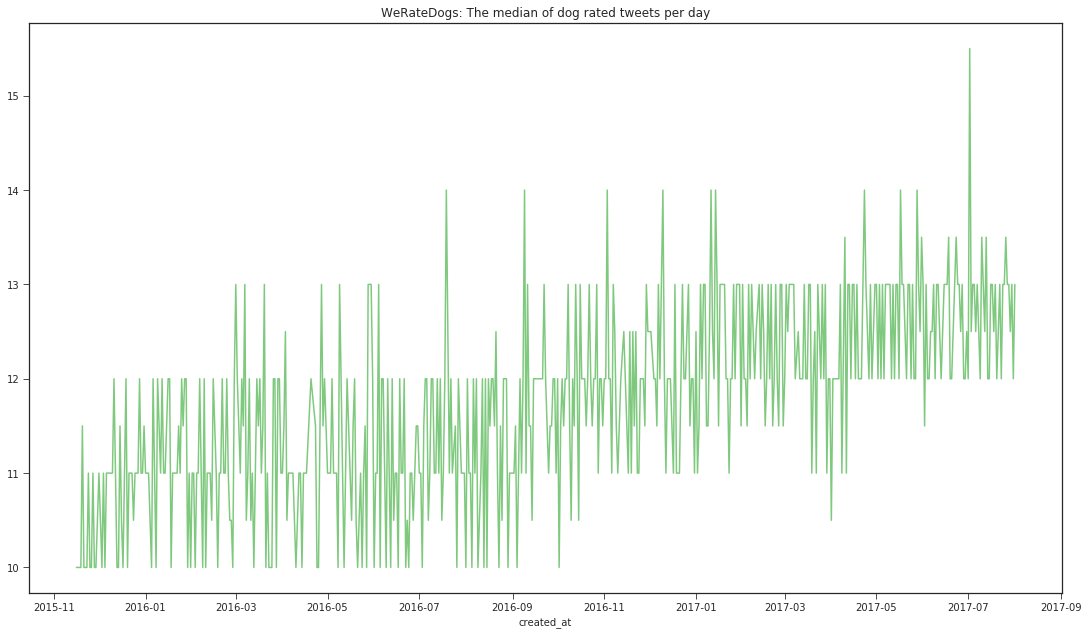

In [74]:
twitter_archives['created_at'] = pd.to_datetime(twitter_archives.created_at)
plt.subplots(figsize=(18.5,10.5))
plt.title('WeRateDogs: The median of dog rated tweets per day')
twitter_archives.groupby(twitter_archives['created_at'].dt.date).median()['rating_numerator'].plot()



From assessing the above Twitter engagement of the median amount of dog tweets per day, there is a trend that it is increasing over time. 


# Twitter Engagement


# What are the retweeting and favourite trends over time?




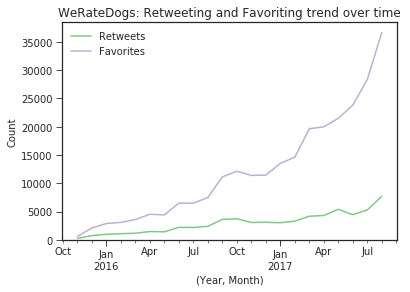

In [75]:
plt.subplots(1, sharex=True)
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['retweet_count'].plot(label='Retweet Count')
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['favorite_count'].plot(label='Favorite Count').set_ylim(18, )                         
plt.title('WeRateDogs: Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')




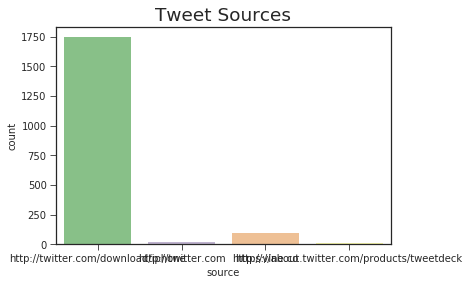

In [82]:
sns.countplot(data=twitter_archives_clean, x='source')
plt.title('Tweet Sources', size=18.5)
plt.savefig('most_used_twitter_source');



From assessing the above model, there is an increase of retweets and favourite tweets that are increasing over time. 

# References

1. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
2. https://grantpatience.com/2019/08/29/project-who-are-the-goodest-doggos-wrangling-analysing-weratedogs-tweets-to-find-the-goodest-floofs/
3. https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
4. https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy
5. S. Github: YashMotwani,https://github.com/YashMotwani/We-Rate-Dogs-Data-Wrangling/blob/master/act_report.pdf










